In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Importing fastai modules

In [39]:
from fastai.vision import URLs, ImageDataBunch, cnn_learner, untar_data, get_image_files, \
get_transforms, models, accuracy, ClassificationInterpretation
from fastai.metrics import error_rate

# Defining batch size

In [ ]:
batch_size = 64

# Download Data

In [4]:
path = untar_data(URLs.MNIST); path

PosixPath('/Users/anuragsharma/.fastai/data/mnist_png')

In [5]:
path.ls()

[PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/testing')]

In [21]:
path_img = path/'training'
path_img.ls()

[PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/9'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/0'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/7'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/6'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/1'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/8'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/4'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/3'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/2'),
 PosixPath('/Users/anuragsharma/.fastai/data/mnist_png/training/5')]

# Data exploration

In [9]:
from PIL import Image
import numpy as np

In [14]:
image_path = "/Users/anuragsharma/.fastai/data/mnist_png/training/0/9914.png"

In [15]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [16]:
img = load_image(image_path)

In [17]:
img.shape

(28, 28)

# Data prepration & transformation

In [34]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms, size=28)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

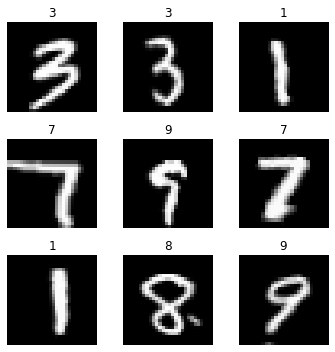

In [35]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

# Training

In [36]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/anuragsharma/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.55MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.455830,0.329404,0.894600,07:21
1,0.249705,0.137527,0.955600,07:27


In [40]:
interp = ClassificationInterpretation.from_learner(learn)

In [42]:
interp.most_confused(min_val=5)

[('7', '9', 42),
 ('9', '8', 26),
 ('3', '8', 24),
 ('5', '3', 24),
 ('3', '5', 21),
 ('2', '8', 18),
 ('4', '9', 16),
 ('5', '8', 14),
 ('6', '0', 14),
 ('3', '2', 13),
 ('7', '2', 12),
 ('2', '3', 11),
 ('4', '7', 10),
 ('7', '1', 10),
 ('8', '2', 9),
 ('6', '5', 8),
 ('0', '8', 7),
 ('7', '4', 7),
 ('0', '2', 6),
 ('4', '6', 6),
 ('9', '0', 6),
 ('9', '4', 6),
 ('0', '6', 5),
 ('4', '2', 5),
 ('4', '8', 5),
 ('5', '9', 5),
 ('7', '3', 5),
 ('9', '7', 5)]